In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

### Understanding the Data

In [3]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# helpful in seeing total number of col and rows and non-null values in each row
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# As the values seem repeating in ocean_proximity column
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
# Summary of numerical attribute
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


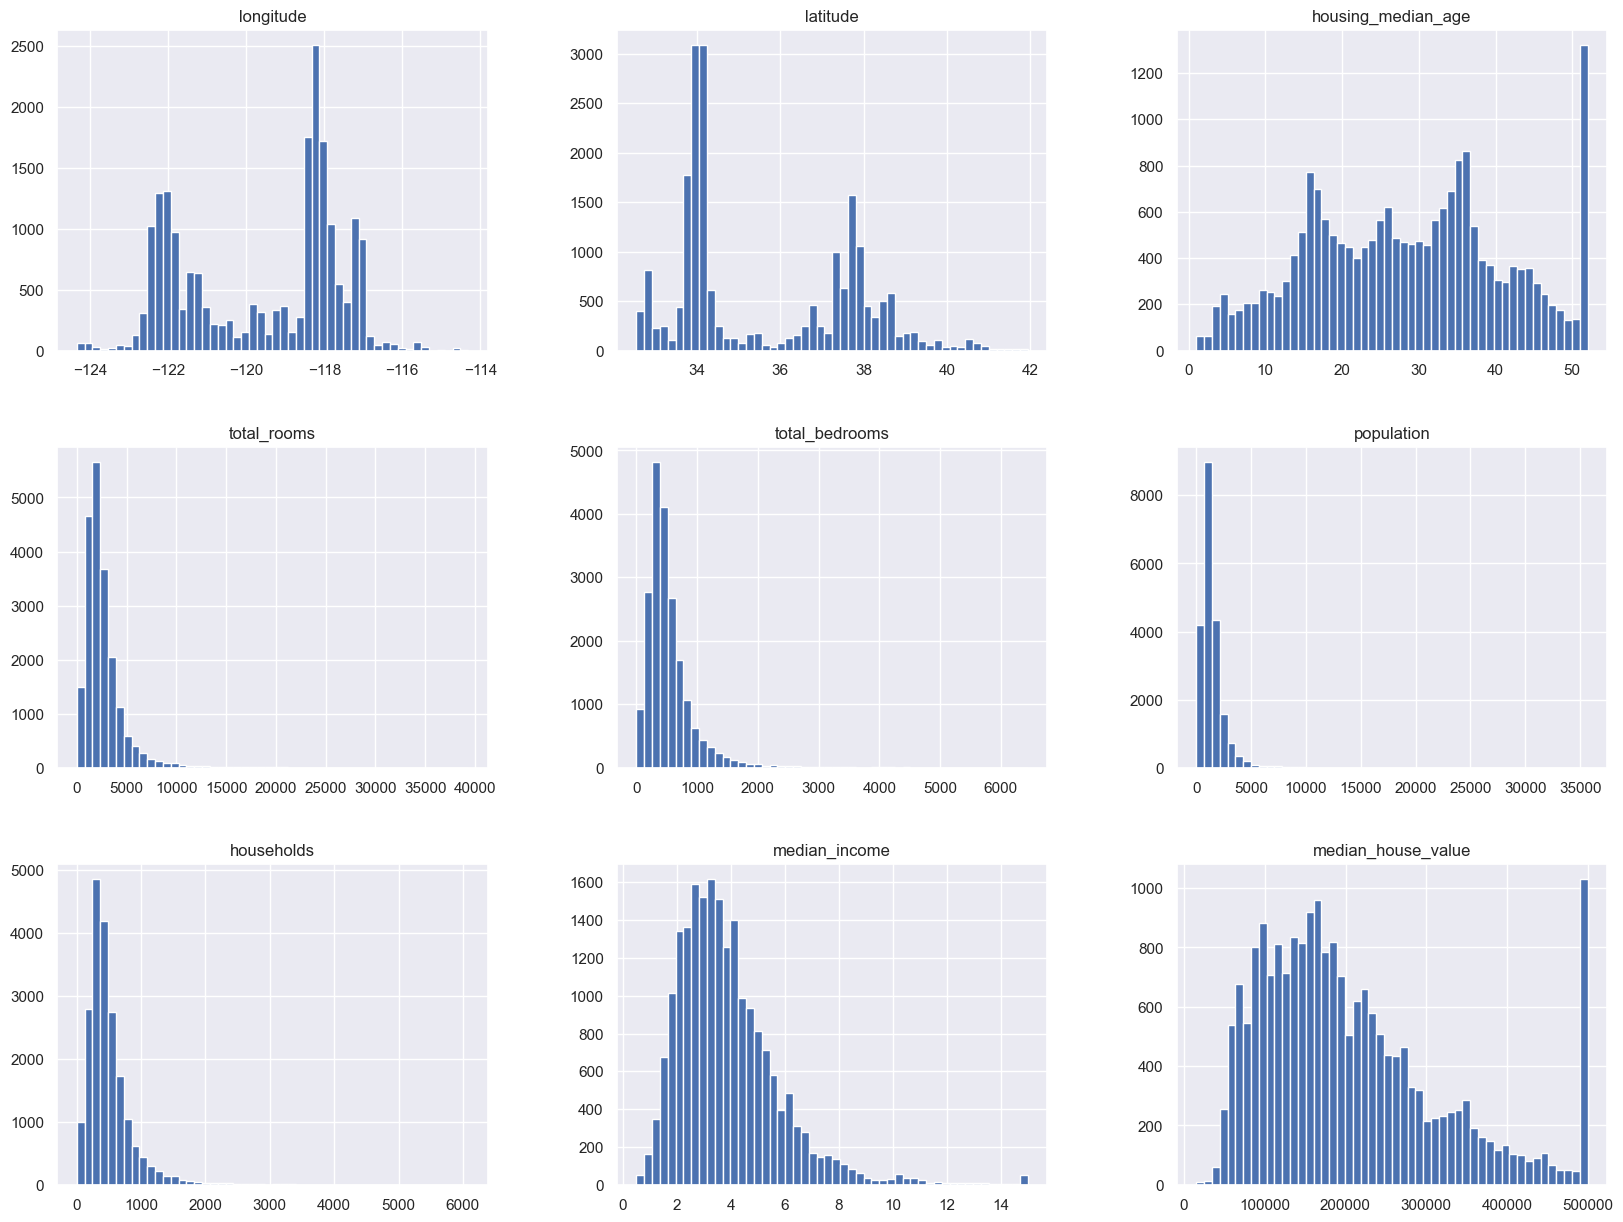

In [7]:
# bins = 50, ensures that each histogram is divided into 50 parts
housing.hist(bins=50, figsize=(20,15))
plt.show()

1. From the data, we can feel there is something wroing in the median income, so we find from team who collected the data that median_income is scaled to $10,000 and is capped at 0.499 at lower end and 15.001 at higher end.
2. Attributes have different range.
3. Attributes are tail heavy so need to be standardised.

### Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

1. We could directly do the split but we won't represent each category (if there is some) in a justified manner.
2. Basic understanding tells us that representing each income household is important, it is an important class.
3. So, we now divide the median_income into ranges for representation as classes.
4. Good range could be (as seen from graph) 0, 1.5, 3, 4.5, 6, inf

In [9]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0,1.5,3,4.5,6,np.inf], labels=[1,2,3,4,5])

In [10]:
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

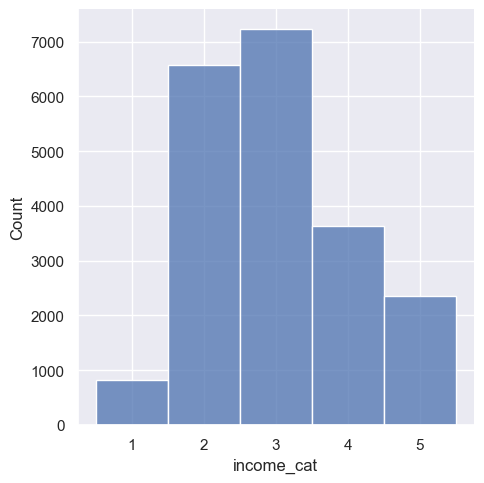

In [11]:
sns.displot(housing["income_cat"])

In [12]:
strat_train_set, strat_test_set = train_test_split(housing, stratify=housing["income_cat"], test_size=0.2, random_state=42)

Removed the income category column that we made after dividing the data in the way we want from the stratified sets only.

In [13]:
strat_train_set = strat_train_set.drop("income_cat",axis=1)
strat_test_set = strat_test_set.drop("income_cat",axis=1)

### Visualising Data to Gain Insights

In [14]:
# A dataset with which we can play freely without caring about harming training dataset
housing_cpy = strat_train_set.copy()

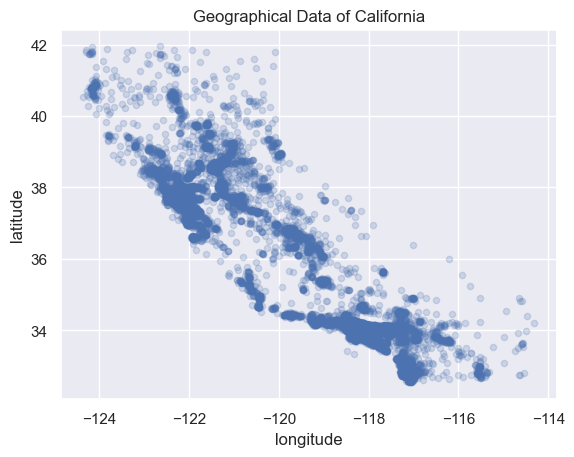

In [15]:
# Visualising Geographical Data
housing_cpy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2) # alpha sets the density thing
plt.title("Geographical Data of California")
plt.show()

1. From this map with high density zone being darker, we can see that it is actually first of all whole of California.
2. More data is from Bay Area, LA, San Diego, Central Valley, etc.

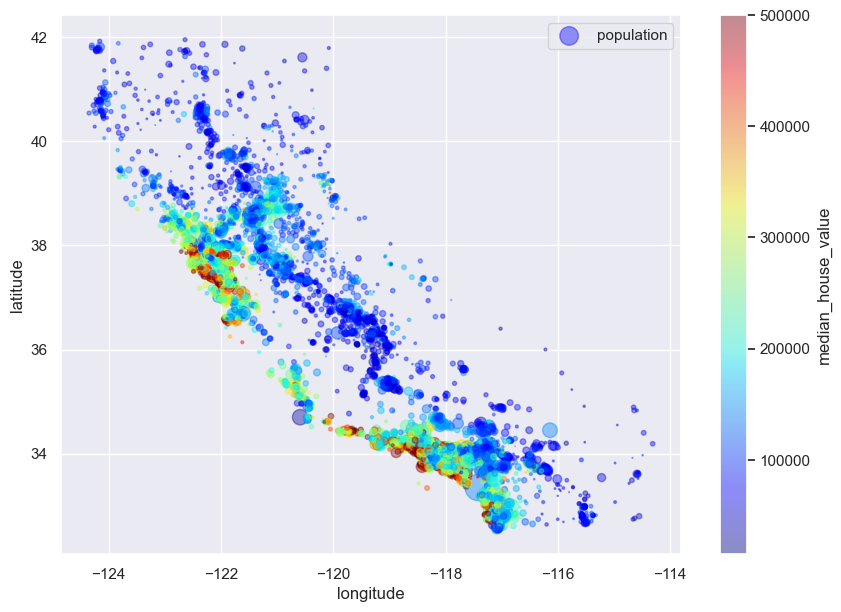

In [16]:
housing_cpy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing_cpy["population"]/100, label="population", figsize=(10,7),
                c="median_house_value", cmap="jet", colorbar=True)
plt.legend()
plt.show()

Talking about the function:  
`housing_cpy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing_cpy["population"]/100, label="population", figsize=(10,7),
                c="median_house_value", cmap="jet", colorbar=True)`  
* `s` : It indicates the radius of the circle in pt^2 unit. 1 pt = 1/72 in. Larger circle means larger population.
* `cmap` : Decides the gradient of color scheme to be used which is displayed when colorbar=True
* `c` : Decides which is darker and lighter based on cmap scheme used.

### Finding the Correlations

In [17]:
# For correlation matrix I need to use only numerical datasets, so I have dropped, ocean_proximity for now
corr_matrix = housing_cpy.drop("ocean_proximity",axis=1).corr()

In [18]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

1. This shows that house value increases as the income of household increases which is obvious
2. Though there is really little negative correlation with lattitude but it shows going North the value decreases which is a major insight.

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

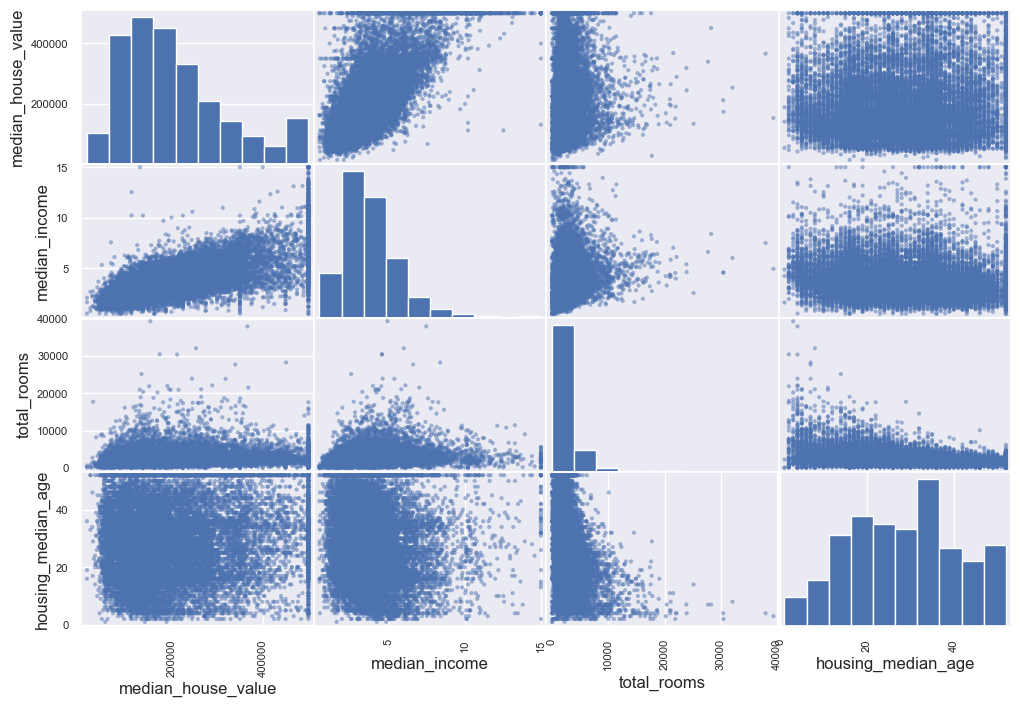

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing_cpy[attributes], figsize=(12,8))

A clear trend can be seen in median_house_value vs median_income

### Feature Extraction

In [20]:
housing_cpy["rooms_per_household"] = housing_cpy["total_rooms"]/housing_cpy["households"]
housing_cpy["bedrooms_per_room"] = housing_cpy["total_bedrooms"]/housing_cpy["total_rooms"]
housing_cpy["population_per_household"] = housing_cpy["population"]/housing_cpy["households"]

In [21]:
corr_matrix = housing_cpy.drop("ocean_proximity",axis=1).corr()

In [22]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

A strange observation(or is it?), more the price of house, lesser are the bedrooms with respect to the rooms.

### Feature and Target Splitting

In [23]:
X = strat_train_set.drop("median_house_value", axis=1)
Y = strat_train_set["median_house_value"]

### Data Cleaning

In [24]:
X.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [25]:
median_bedrooms = X["total_bedrooms"].median()
X["total_bedrooms"] = X["total_bedrooms"].fillna(median_bedrooms)

In [26]:
print(X["total_bedrooms"].isnull().sum())

0


### Encoding Categorical Data

We have one categorical data which is `ocean_proximity`. Now we can deal with it in 2 ways:  
1. **Using Ordinal Encoder**
   * It assigns some integer value starting from 0 to all categories.
   * It is good in classification problem, but not really helpful in regression
   * In regression, if something is classified as 1 and other as 2, regressor will think that these are closer in nature compared to a 1 and a 3 which is definitely not the case.
2. **Using One Hot Encoder**
   * It makes a column for each category and gives them a 1 and a 0 value only.
   * This helps in removing the regression problem still giving some importance to them.

In [27]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [28]:
# initialising the object
cat_encoder = OneHotEncoder()
# fitting on a dataset and transforming the same dataset
encoded = cat_encoder.fit_transform(X[["ocean_proximity"]])

> X[[" "]] writing in this way convert series to a pandas dataframe with index

1. Stored as a sparse matrix which stores data in a different manner i.e., by storing the coordinate which is 1, it saves space
2. Though we have made sparse=False, it means that data no longer is made as scipy.sparse, it is made as numpy so can be easily included into our dataframe.

In [38]:
encoded = encoded.toarray()

In [42]:
encoded_df = pd.DataFrame(encoded, columns=cat_encoder.get_feature_names_out(["ocean_proximity"]), index=X.index)

In [43]:
encoded_df.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,0.0,1.0,0.0,0.0,0.0
15502,0.0,0.0,0.0,0.0,1.0
2908,0.0,1.0,0.0,0.0,0.0
14053,0.0,0.0,0.0,0.0,1.0
20496,1.0,0.0,0.0,0.0,0.0


In [45]:
X = pd.concat([X, encoded_df], axis=1)
X = X.drop("ocean_proximity", axis=1)

In [47]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,0.0,1.0,0.0,0.0,0.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,0.0,0.0,0.0,0.0,1.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,0.0,1.0,0.0,0.0,0.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,0.0,0.0,0.0,0.0,1.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1.0,0.0,0.0,0.0,0.0


### Standard Scaler

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

### Making Transformation Pipelines

Pipeline for numerical data

> Using the Column Transformer to make the complete pipeline

### Training the Model

In [51]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

LinearRegression()

In [55]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X,Y)

DecisionTreeRegressor()

In [70]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X,Y)

RandomForestRegressor()

### Evaluating the Model

In [57]:
from sklearn.metrics import mean_squared_error

In [56]:
Y_pred = lin_reg.predict(X)
lin_mse = mean_squared_error(Y_pred, Y)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

69050.56219504567


This is a very large error considering our median is roughly around `$120,000` to `$265,000`

In [58]:
Y_pred = tree_reg.predict(X)
tree_mse = mean_squared_error(Y_pred, Y)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.0


This is most probably overfitting, having 0 error is just another way of saying OVERFITTING.

In [71]:
Y_pred = forest_reg.predict(X)
forest_mse = mean_squared_error(Y_pred, Y)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

18365.001335320565


This sounds really promising, doesn't seem to overfit

### Better Evaluation using Cross-Validation

In [66]:
def display_scores(scores):
    print(f"Scores : {scores}")
    print(f"Mean : {scores.mean():0.3f}")
    print(f"Standard Deviation: {scores.std():0.3f}")

In [59]:
from sklearn.model_selection import cross_val_score

In [68]:
scores = cross_val_score(lin_reg, X, Y, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores : [72229.03469752 65318.2240289  67706.39604745 69368.53738998
 66767.61061621 73003.75273869 70522.24414582 69440.77896541
 66930.32945876 70756.31946074]
Mean : 69204.323
Standard Deviation: 2372.071


In [69]:
scores = cross_val_score(tree_reg, X, Y, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores : [70278.64235213 68800.16763871 65215.17048182 69174.45446474
 67997.24933716 69025.58313847 73296.8677864  70633.78686689
 67242.41112714 71303.30216828]
Mean : 69296.764
Standard Deviation: 2137.343


> Clear indication that Decision Tree Regressor itself is not good.  
> Remember we have not yet used the test set.

In [72]:
scores = cross_val_score(forest_reg, X, Y, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores : [50610.01857963 49272.40716769 45849.20241445 50421.95468001
 47528.4781612  49692.32072808 51445.88188232 48627.9676912
 47422.06034396 53069.07927145]
Mean : 49393.937
Standard Deviation: 2021.799


> Really good performance compared to others

### Fine Tuning of the Model

In [73]:
from sklearn.model_selection import GridSearchCV

In [75]:
param_grid = [
    {'n_estimators':[3,10,15], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[10,30], 'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X,Y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 15]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [76]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 30}

In [77]:
cvres = grid_search.cv_results_

In [87]:
result_df = pd.DataFrame(cvres)

In [90]:
result_df["RMSE"] = np.sqrt(-1*result_df["mean_test_score"])

In [97]:
result_df[["params","RMSE"]].sort_values(by="RMSE", ascending=True).head()

,params,RMSE
17,"{'bootstrap': False, 'max_features': 4, 'n_est...",49789.488284
15,"{'bootstrap': False, 'max_features': 3, 'n_est...",50155.130454
11,"{'max_features': 8, 'n_estimators': 15}",50889.356832
8,"{'max_features': 6, 'n_estimators': 15}",50970.169277
13,"{'bootstrap': False, 'max_features': 2, 'n_est...",51460.868220


### Analyzing the Best Model and its Errors

In [100]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.28156574e-01, 1.07345702e-01, 4.77324985e-02, 4.21003419e-02,
       3.38649004e-02, 5.04759707e-02, 3.33648328e-02, 3.73347457e-01,
       2.16906879e-02, 1.42333911e-01, 7.85184427e-05, 8.59037418e-03,
       1.09182316e-02])

In [117]:
attribs = list(housing.drop(['ocean_proximity', 'income_cat'], axis=1).columns)

In [118]:
cat_attribs = list(cat_encoder.categories_[0])

In [119]:
attributes = attribs + cat_attribs

In [120]:
weights = sorted(zip(feature_importances, attributes), reverse=True)

In [125]:
for i in weights:
    print(f"{i[0]} ==> {i[1]}")

0.37334745726599994 ==> median_income
0.1423339109274281 ==> <1H OCEAN
0.12815657375340833 ==> longitude
0.10734570151241421 ==> latitude
0.05047597073660025 ==> population
0.04773249853608446 ==> housing_median_age
0.04210034194263699 ==> total_rooms
0.033864900378812256 ==> total_bedrooms
0.033364832777167085 ==> households
0.02169068792066777 ==> median_house_value
0.010918231627632563 ==> NEAR BAY
0.008590374178457075 ==> ISLAND
7.851844269096557e-05 ==> INLAND


1. Here we can see that features of ocean_proximity are in general useless except 1. So we can drop those.
2. Some extra features like rooms_per_household might get a better weight and hence can be included as well.

### Evaluating on Test Set

In [126]:
final_model = grid_search.best_estimator_

In [127]:
X_test = strat_test_set.drop("median_house_value", axis=1)
Y_test = strat_test_set["median_house_value"]

Making Pipeline

In [129]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

Column Transformer

In [131]:
num_attribs = list(X_test.drop("ocean_proximity", axis=1).columns)
cat_attribs = ["ocean_proximity"]

In [132]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

> NOTE:  
> This part of code is written because the pipeline must be fitted upon the training set and not the test set

In [134]:
X_train = strat_train_set.drop("median_house_value", axis=1)

In [135]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [141]:
# To get the OneHotEncoder categories do this
cat_encoder_pipeline = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder_pipeline.categories_[0])
print(cat_one_hot_attribs)

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']


> Now we will be processing the test set

In [142]:
X_test_prepared = full_pipeline.transform(X_test)

In [146]:
final_pred = final_model.predict(X_test_prepared)

In [149]:
final_mse = mean_squared_error(Y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

49731.333013435134


In [152]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Final Metrics for Evaluation:")
MAE = mean_absolute_error(Y_test, final_pred)
MSE = mean_squared_error(Y_test, final_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(Y_test, final_pred)
print(f"Mean Absolute Error = {MAE}")
print(f"Root Mean Squared Error = {RMSE}")
print(f"R2-score = {R2*100:0.2f}%")

Final Metrics for Evaluation:
Mean Absolute Error = 33359.21942021963
Root Mean Squared Error = 49731.333013435134
R2-score = 81.02%
